### 1: Import all the necessary libs

In [1]:
import pandas as pd
import numpy as np
import requests 
import tweepy 
import wptools
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import re
import time
import json
import wget
import base64
from PIL import Image
from io import BytesIO
from IPython.display import HTML
import glob
from nltk.corpus import stopwords
import seaborn as sns
from PIL import ImageFont, ImageDraw, Image
import textwrap
%matplotlib inline

### 2.1: Gather image_prediction data
- <font color='red'>Revise 1.1</font>: add download part
- <font color='red'>Revise 1.2</font>: do basic check for the downloaded data

In [2]:
'''
proxies = {
  "http": "http://10.240.49.201:8080",
  "https": "http://10.240.49.201:8080",
}
path = '/Users/mhl/Documents/NanoDegree/Project2/'
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url, proxies=proxies)
if response.status_code == 200:
    with open(path+re.search(r'\/([^\/]*\.tsv)', url).groups(0)[0], 'wb') as f:
        f.write(response.content)
'''

'\nproxies = {\n  "http": "http://10.240.49.201:8080",\n  "https": "http://10.240.49.201:8080",\n}\npath = \'/Users/mhl/Documents/NanoDegree/Project2/\'\nurl = \'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv\'\nresponse = requests.get(url, proxies=proxies)\nif response.status_code == 200:\n    with open(path+re.search(r\'\\/([^\\/]*\\.tsv)\', url).groups(0)[0], \'wb\') as f:\n        f.write(response.content)\n'

In [3]:
dog_rates_image = pd.read_csv('image-predictions.tsv', sep='\t')
dog_rates_image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


### 2.2: Gather more data using tweepy
- gather data: based on tweet id, get the json file of each tweet
- save data: write the json file using appending mode 'a' to one file
- extract data to form additional DataFrame: tweet_id, retweet_count, favorite_count, follower_count, media_url,. For this part, should have the basic knowledge of tweet json file. Since we have image-predictions file, may media_url is not that necessary
- save the gathering data to csv file

In [4]:
# prepare to use tweepy
# delte
consumer_key = ''
consumer_secret = ''
access_token = ''
access_secret = ''

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, proxy="10.240.49.201:8080")

In [5]:
# gather and save data
'''
print (time.time())
tweet_list = []
for loop in range(2):
    tweet_id = dog_rates.loc[loop, 'tweet_id']
    public_tweets = api.home_timeline(id='WeRateDogs', max_id=tweet_id, count=1)
    #for tweet in public_tweets:
        #tweet_list.append({'tweet_id':tweet_id, 'retweet_count': tweet.retweet_count, 'favorite_count':tweet.favorite_count})
    with open('/Users/mhl/Documents/NanoDegree/Project2/data_gather_json.txt', 'a') as file:
        json.dump(public_tweets[0]._json, file) 
print (time.time())   
'''

"\nprint (time.time())\ntweet_list = []\nfor loop in range(2):\n    tweet_id = dog_rates.loc[loop, 'tweet_id']\n    public_tweets = api.home_timeline(id='WeRateDogs', max_id=tweet_id, count=1)\n    #for tweet in public_tweets:\n        #tweet_list.append({'tweet_id':tweet_id, 'retweet_count': tweet.retweet_count, 'favorite_count':tweet.favorite_count})\n    with open('/Users/mhl/Documents/NanoDegree/Project2/data_gather_json.txt', 'a') as file:\n        json.dump(public_tweets[0]._json, file) \nprint (time.time())   \n"

In [6]:
# extract data
tweet_list = []
file = open('/Users/mhl/Documents/NanoDegree/Project2/tweet_json.txt', 'r')
for line in file:
    tweet_list.append(json.loads(line))

In [7]:
# find difference for each kind of tweet
dog_rates = pd.read_csv('twitter-archive-enhanced.csv')
dog_rates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [8]:
# 156 retweet his own tweet, all have retweet_status_id, why cannot find this keyword in json?
dog_rates_retweet_himself = dog_rates[~dog_rates.text.str.extract('(^RT @dog_rates.*)').isnull()]
for loop in tweet_list:
    if loop['id'] == dog_rates_retweet_himself.tweet_id.iloc[5]:
        print ('yes')
        break
'''
for loop in tweet_list:
    if loop['id'] == 866334964761202691:
        print ('yes')
        break
loop
'''
loop

yes


/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  


{'contributors': None,
 'coordinates': None,
 'created_at': 'Tue Jun 13 01:14:41 +0000 2017',
 'display_text_range': [0, 140],
 'entities': {'hashtags': [],
  'symbols': [],
  'urls': [],
  'user_mentions': [{'id': 4196983835,
    'id_str': '4196983835',
    'indices': [3, 13],
    'name': 'SpookyWeRateDogs™',
    'screen_name': 'dog_rates'}]},
 'favorite_count': 0,
 'favorited': False,
 'full_text': "RT @dog_rates: This is Coco. At first I thought she was a cloud but clouds don't bork with such passion. 12/10 would hug softly https://t.c…",
 'geo': None,
 'id': 874434818259525634,
 'id_str': '874434818259525634',
 'in_reply_to_screen_name': None,
 'in_reply_to_status_id': None,
 'in_reply_to_status_id_str': None,
 'in_reply_to_user_id': None,
 'in_reply_to_user_id_str': None,
 'is_quote_status': False,
 'lang': 'en',
 'place': None,
 'retweet_count': 15442,
 'retweeted': False,
 'retweeted_status': {'contributors': None,
  'coordinates': None,
  'created_at': 'Sun May 21 16:48:45 +000

In [9]:
# 78 in reply tweet
dog_rates_in_reply = dog_rates[~pd.isnull(dog_rates.in_reply_to_user_id)]
for loop in tweet_list:
    if loop['id'] == dog_rates_in_reply.tweet_id.iloc[5]:
        print ('yes')
        break
'''
for loop in tweet_list:
    if loop['id'] == 667152164079423490:
        print ('yes')
        break
'''
loop

yes


{'contributors': None,
 'coordinates': None,
 'created_at': 'Fri May 12 17:12:53 +0000 2017',
 'display_text_range': [0, 139],
 'entities': {'hashtags': [],
  'media': [{'display_url': 'pic.twitter.com/lVU5GyNFen',
    'expanded_url': 'https://twitter.com/dog_rates/status/863079547188785154/photo/1',
    'id': 863079538779013120,
    'id_str': '863079538779013120',
    'indices': [140, 163],
    'media_url': 'http://pbs.twimg.com/media/C_pGRInUwAAmTY_.jpg',
    'media_url_https': 'https://pbs.twimg.com/media/C_pGRInUwAAmTY_.jpg',
    'sizes': {'large': {'h': 1035, 'resize': 'fit', 'w': 749},
     'medium': {'h': 1035, 'resize': 'fit', 'w': 749},
     'small': {'h': 680, 'resize': 'fit', 'w': 492},
     'thumb': {'h': 150, 'resize': 'crop', 'w': 150}},
    'type': 'photo',
    'url': 'https://t.co/lVU5GyNFen'}],
  'symbols': [],
  'urls': [],
  'user_mentions': []},
 'extended_entities': {'media': [{'display_url': 'pic.twitter.com/lVU5GyNFen',
    'expanded_url': 'https://twitter.com/do

In [10]:
# 181 retweet id not null
dog_rates_retweet_not_null = dog_rates[~pd.isnull(dog_rates.retweeted_status_id)]
#print (dog_rates_retweet_not_null.retweeted_status_id)
for loop in tweet_list:
    if loop['id'] == dog_rates_retweet_not_null.tweet_id.iloc[6]:
        print ('yes')
        break
loop

yes


{'contributors': None,
 'coordinates': None,
 'created_at': 'Wed Jun 21 19:36:23 +0000 2017',
 'display_text_range': [0, 122],
 'entities': {'hashtags': [],
  'media': [{'display_url': 'pic.twitter.com/dJx4Gzc50G',
    'expanded_url': 'https://twitter.com/rachel2195/status/876850772322988033/photo/1',
    'id': 876850756556607488,
    'id_str': '876850756556607488',
    'indices': [99, 122],
    'media_url': 'http://pbs.twimg.com/media/DCszHgmW0AAmIpT.jpg',
    'media_url_https': 'https://pbs.twimg.com/media/DCszHgmW0AAmIpT.jpg',
    'sizes': {'large': {'h': 2048, 'resize': 'fit', 'w': 1536},
     'medium': {'h': 1200, 'resize': 'fit', 'w': 900},
     'small': {'h': 680, 'resize': 'fit', 'w': 510},
     'thumb': {'h': 150, 'resize': 'crop', 'w': 150}},
    'source_status_id': 876850772322988033,
    'source_status_id_str': '876850772322988033',
    'source_user_id': 512804507,
    'source_user_id_str': '512804507',
    'type': 'photo',
    'url': 'https://t.co/dJx4Gzc50G'}],
  'symbols

In [11]:
dog_rates_add = []
for tweet in tweet_list:
    if tweet.get('retweeted_status'):
        dog_rates_add.append({'tweet_id':tweet['id'],\
                              'favorite_count':tweet['retweeted_status']['favorite_count'],\
                              'retweet_count':tweet['retweeted_status']['retweet_count'],\
                              'followers_count':tweet['user']['followers_count']})
    else:
        dog_rates_add.append({'tweet_id':tweet['id'],\
                              'favorite_count':tweet['favorite_count'],\
                              'retweet_count':tweet['retweet_count'],\
                              'followers_count':tweet['user']['followers_count']})        
dog_rates_add = pd.DataFrame(dog_rates_add)

- <font color='red'>Revise 3</font>: index should be false

In [12]:
dog_rates_add.to_csv('dog_rates_add.csv', index=False)

### 3: Read existing data in

In [13]:
dog_rates = pd.read_csv('twitter-archive-enhanced.csv')
dog_rates_image = pd.read_csv('image-predictions.tsv', sep='\t')
pd.set_option('max_colwidth', 200)
pd.set_option('display.max_colwidth', -1)

### 4: Assess

#### Quality
##### `dog_rates` table
- timestamp should be datetime

- source, expanded url seems not that useful, can drop
- some items are duplicate, e.g., 'This is Charlie. He fell asleep on a heating vent...' All duplicate are from the items that author retweets his own tweet. no matter, we will drop all the in_reply and retweet ones this time
- for the first time, we just focus on the tweet created directly by author, so drop in_reply and retweet onesretweet ones. And drop the items and related columns

- rating_denominator min/max value is not reasonable, because several dogs in one picture
- the rating_numerator is not extractely correctly, the text may include two xx/xx string, should get the score one, e.g, '...ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho...'
- some xx/xx strings are not rating value, e.g., '...She smiles 24/7 &amp...', its tweetid is 810984652412424192 
- rating for tweet_id 676957860086095872 is wrong, extract not correctly

- name is not extractely correctly, 'This is by far', should not always extract the word after 'This is'. remove the wrong names, e.g., 'a', 'an', 'the'.etc
- (to do)name "jack is xxx", some names can not be extracted correctly
- some stage items are not right, e.g., 'doggopupper', 'doggofloofer'.etc
- for the dog bread, just keep the dog breed that confidience value bigger than 0.5. rename p1 to breed
- for name, stage, breed. make all the none to '', to display more clearly
- add another two columns, retweet_probability, favorite_probability, float, then recalculate by deviding follower_counts
- drop the unuseful column, rating_denominator

##### `dog_rates_image` table
- many duplicate items in image file, most of them are retweet. However, if we delete retweet items, this will be not that important

##### `dog_rates_add` table

#### Tidiness
##### `dog_rates` table
- doggo, floofer, pupper, puppo should be one column, all describe the stage of dog. Then drop columns 'doggo, floofer, pupper, puppo'

##### `dog_rates_image` table
- image url, p1, p1_conf, p1_dog should be integrated to dog_rates_table

##### `dog_rates_add` table
- all the information should be integrated to dog_rates_table


In [14]:
# dog_rates table
dog_rates.head(5)
# doggo, floofer, pupper, puppo should be one column, all describe the stage of dog

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None


In [15]:
dog_rates.describe()
# the rating_numerator and rating_denominator min/max value is not reasonable

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [16]:
dog_rates.info()
# timestamp should be datatime

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [17]:
dog_rates.sample(20)
# name is not extractely correctly, 'This is by far', should not always extract the word after 'This is', 'say hello to', ''
# some xx/xx strings are not rating value, e.g., '...7/10 would walk the shit out o...'

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
272,840761248237133825,NaN,NaN,2017-03-12 03:07:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: Say hello to Maddie and Gunner. They are considerably pupset about bath time. Both 12/10 but Gunner needs your help\n\nhttps:/…,8.406323e+17,4.196984e+09,2017-03-11 18:35:42 +0000,"https://www.gofundme.com/3hgsuu0,https://twitter.com/dog_rates/status/840632337062862849/photo/1",12,10,Maddie,None,None,None,None
2051,671488513339211776,NaN,NaN,2015-12-01 00:38:31 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Julius. He's a cool dog. Carries seashell everywhere. Rad segmented legs. Currently attacking castle. 8/10 https://t.co/CwUK5AIgeD,NaN,NaN,NaN,https://twitter.com/dog_rates/status/671488513339211776/photo/1,8,10,Julius,None,None,None,None
1974,673148804208660480,NaN,NaN,2015-12-05 14:35:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Fletcher. He's had a ruff night. No more Fireball for Fletcher. 8/10 it'll be over soon pupper https://t.co/tA4WpkI2cw,NaN,NaN,NaN,https://twitter.com/dog_rates/status/673148804208660480/photo/1,8,10,Fletcher,None,None,pupper,None
822,770093767776997377,NaN,NaN,2016-08-29 03:00:36 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is just downright precious af. 12/10 for both pupper and doggo https://t.co/o5J479bZUC,7.410673e+17,4.196984e+09,2016-06-10 00:39:48 +0000,"https://twitter.com/dog_rates/status/741067306818797568/photo/1,https://twitter.com/dog_rates/status/741067306818797568/photo/1",12,10,just,doggo,None,pupper,None
603,798628517273620480,NaN,NaN,2016-11-15 20:47:30 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This a Norwegian Pewterschmidt named Tickles. Ears for days. 12/10 I care deeply for Tickles https://t.co/0aDF62KVP7,6.675094e+17,4.196984e+09,2015-11-20 01:06:48 +0000,"https://twitter.com/dog_rates/status/667509364010450944/photo/1,https://twitter.com/dog_rates/status/667509364010450944/photo/1",12,10,None,None,None,None,None
379,827653905312006145,NaN,NaN,2017-02-03 23:04:02 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Boots. She doesn't know what to do with treats so she just holds them. Very good girl. 12/10 would give more treats https://t.co/eAA8lratd3,NaN,NaN,NaN,https://twitter.com/dog_rates/status/827653905312006145/photo/1,12,10,Boots,None,None,None,None
1801,676957860086095872,NaN,NaN,2015-12-16 02:51:45 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",10/10 I'd follow this dog into battle no questions asked https://t.co/ngTNXYQF0L,NaN,NaN,NaN,https://twitter.com/dog_rates/status/676957860086095872/video/1,10,10,None,None,None,None,None
2203,668641109086707712,NaN,NaN,2015-11-23 04:03:57 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Hanz. He heard some thunder. 10/10 https://t.co/pKJK23j0QZ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668641109086707712/photo/1,10,10,Hanz,None,None,None,None
1619,684959798585110529,NaN,NaN,2016-01-07 04:48:36 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Jerry. He's a neat dog. No legs (tragic). Has more horns than a dog usually does. Bark is unique af. 5/10 https://t.co/85q7xlplsJ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/684959798585110529/photo/1,5,10,Jerry,None,None,None,None
1037,744709971296780288,NaN,NaN,2016-06-20 01:54:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""

In [18]:
dog_rates.source.value_counts()
# most of them are from iphone

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                        91  
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                     33  
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>    11  
Name: source, dtype: int64

In [19]:
dog_rates.retweeted_status_user_id.value_counts()
# most retweet his own tweet

4.196984e+09    156
4.296832e+09    2  
5.870972e+07    1  
6.669901e+07    1  
4.119842e+07    1  
7.475543e+17    1  
7.832140e+05    1  
7.266347e+08    1  
4.871977e+08    1  
5.970642e+08    1  
4.466750e+07    1  
1.228326e+09    1  
7.992370e+07    1  
2.488557e+07    1  
7.874618e+17    1  
3.638908e+08    1  
5.128045e+08    1  
8.117408e+08    1  
1.732729e+09    1  
1.960740e+07    1  
1.547674e+08    1  
3.410211e+08    1  
7.124572e+17    1  
2.804798e+08    1  
1.950368e+08    1  
Name: retweeted_status_user_id, dtype: int64

In [20]:
dog_rates.in_reply_to_user_id.value_counts()
# most in reply his own tweet

4.196984e+09    47
2.195506e+07    2 
7.305050e+17    1 
2.916630e+07    1 
3.105441e+09    1 
2.918590e+08    1 
2.792810e+08    1 
2.319108e+09    1 
1.806710e+08    1 
3.058208e+07    1 
2.625958e+07    1 
1.943518e+08    1 
3.589728e+08    1 
8.405479e+17    1 
2.894131e+09    1 
2.143566e+07    1 
2.281182e+09    1 
1.648776e+07    1 
4.717297e+09    1 
2.878549e+07    1 
1.582854e+09    1 
4.670367e+08    1 
4.738443e+07    1 
1.361572e+07    1 
1.584641e+07    1 
2.068372e+07    1 
1.637468e+07    1 
1.185634e+07    1 
1.198989e+09    1 
1.132119e+08    1 
7.759620e+07    1 
Name: in_reply_to_user_id, dtype: int64

In [21]:
dog_rates.name.value_counts()

None         745
a            55 
Charlie      12 
Cooper       11 
Oliver       11 
Lucy         11 
Lola         10 
Penny        10 
Tucker       10 
Bo           9  
Winston      9  
Sadie        8  
the          8  
Bailey       7  
Buddy        7  
Toby         7  
an           7  
Daisy        7  
Leo          6  
Oscar        6  
Bella        6  
Koda         6  
Dave         6  
Milo         6  
Jack         6  
Rusty        6  
Jax          6  
Scout        6  
Stanley      6  
Alfie        5  
            ..  
Mitch        1  
Fiji         1  
Loomis       1  
Aldrick      1  
Iroh         1  
Amélie       1  
Cupid        1  
Charleson    1  
Ralphie      1  
Buddah       1  
William      1  
Tedders      1  
Sprout       1  
Rodney       1  
Theo         1  
Naphaniel    1  
Grey         1  
Al           1  
Ruffles      1  
Dylan        1  
Jeffri       1  
Trigger      1  
Aqua         1  
Mack         1  
Pupcasso     1  
Poppy        1  
Schnozz      1  
Blipson      1

In [22]:
dog_rates.retweeted_status_id[dog_rates.name == 'Charlie']
print (dog_rates[dog_rates.tweet_id == dog_rates.retweeted_status_id.iloc[230]])
print (dog_rates[dog_rates.tweet_id == dog_rates.tweet_id.iloc[230]])
# some item are duplicate 

               tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
338  832369877331693569 NaN                    NaN                    

                     timestamp  \
338  2017-02-16 23:23:38 +0000   

                                                                                 source  \
338  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   

                                                                                                                                         text  \
338  This is Charlie. He fell asleep on a heating vent. Would puppreciate your assistance. 11/10 someone help Charlie https://t.co/Dhdx5HnQ4d   

     retweeted_status_id  retweeted_status_user_id retweeted_status_timestamp  \
338 NaN                  NaN                        NaN                         

                                                       expanded_urls  \
338  https://twitter.com/dog_rates/status/832369877331693569/photo/1   

     r

In [23]:
item_duplicate_list = []
print (dog_rates_retweet_not_null.index)
for item_index in dog_rates_retweet_not_null.index:
    if dog_rates_retweet_not_null.loc[item_index, 'retweeted_status_id'] in list(dog_rates.tweet_id):
        #print (dog_rates_retweet_not_null.loc[item_index])
        #print (dog_rates[dog_rates.tweet_id == dog_rates_retweet_not_null.loc[item_index, 'retweeted_status_id']])
        item_duplicate_list.append(dog_rates_retweet_not_null.loc[item_index, 'tweet_id'])
print (len(item_duplicate_list))
# all duplicate are from the items that author retweets his own tweet

Int64Index([  19,   32,   36,   68,   73,   74,   78,   91,   95,   97,
            ...
             926,  937,  943,  949, 1012, 1023, 1043, 1242, 2259, 2260],
           dtype='int64', length=181)
156


In [24]:
dog_rates_in_reply.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
148,863427515083354112,8.634256e+17,7.759620e+07,2017-05-13 16:15:35 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","@Jack_Septic_Eye I'd need a few more pics to polish a full analysis, but based on the good boy content above I'm leaning towards 12/10",NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
1005,747651430853525504,7.476487e+17,4.196984e+09,2016-06-28 04:42:46 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Other pupper asked not to have his identity shared. Probably just embarrassed about the headbutt. Also 12/10 it'll be ok mystery pup,NaN,NaN,NaN,NaN,12,10,None,None,None,pupper,None
1501,692142790915014657,6.920419e+17,4.196984e+09,2016-01-27 00:31:15 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",These are some pictures of Teddy that further justify his 13/10 rating. Please enjoy https://t.co/tDkJAnQsbQ,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/692142790915014657/photo/1,https://twitter.com/dog_rates/status/692142790915014657/photo/1,https://twitter.com/dog_rates/status/692142790915014657/photo/1,https://twitter.com/dog_rates/status/692142790915014657/photo/1",13,10,None,None,None,None,None
1844,675849018447167488,6.758457e+17,4.196984e+09,2015-12-13 01:25:37 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This dog is being demoted to a 9/10 for not wearing a helmet while riding. Gotta stay safe out there. Thank you,NaN,NaN,NaN,NaN,9,10,None,None,None,None,None
1497,692423280028966913,6.924173e+17,4.196984e+09,2016-01-27 19:05:49 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",PUPDATE: just noticed this dog has some extra legs. Very advanced. Revolutionary af. Upgraded to a 9/10,NaN,NaN,NaN,NaN,9,10,None,None,None,None,None
565,802265048156610565,7.331095e+17,4.196984e+09,2016-11-25 21:37:47 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Like doggo, like pupper version 2. Both 11/10 https://t.co/9IxWAXFqze",NaN,NaN,NaN,https://twitter.com/dog_rates/status/802265048156610565/photo/1,11,10,None,doggo,None,pupper,None
1127,729838605770891264,7.291135e+17,4.196984e+09,2016-05-10 01:00:58 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","""Challenge completed"" \n(pupgraded to 12/10) https://t.co/85dTK7XCXB",NaN,NaN,NaN,https://twitter.com/dog_rates/status/729838605770891264/video/1,12,10,None,None,None,None,None
1885,674793399141146624,6.717299e+17,4.196984e+09,2015-12-10 03:30:58 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",I have found another. 13/10 https://t.co/HwroPYv8pY,NaN,NaN,NaN,https://twitter.com/dog_rates/status/674793399141146624/photo/1,13,10,None,None,None,None,None
1819,676590572941893632,6.765883e+17,4.196984e+09,2015-12-15 02:32:17 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",After some outrage from the crowd. Bubbles is being upgraded to a 7/10. That's as high as I'm going. Thank you,NaN,NaN,NaN,NaN,7,10,None,None,None,None,None
409,823333489516937216,8.233264e+17,1.582854e+09,2017-01-23 00:56:15 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@HistoryInPics 13/10,NaN,NaN,NaN,NaN,13,10,None,None,None,None,None


In [25]:
dog_rates.rating_denominator.value_counts()
# some weird values, 11, 2, 15 etc

10     2333
11     3   
50     3   
80     2   
20     2   
2      1   
16     1   
40     1   
70     1   
15     1   
90     1   
110    1   
120    1   
130    1   
150    1   
170    1   
7      1   
0      1   
Name: rating_denominator, dtype: int64

In [26]:
dog_rates.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7       55 
14      54 
5       37 
6       32 
3       19 
4       17 
1       9  
2       9  
420     2  
0       2  
15      2  
75      2  
80      1  
20      1  
24      1  
26      1  
44      1  
50      1  
60      1  
165     1  
84      1  
88      1  
144     1  
182     1  
143     1  
666     1  
960     1  
1776    1  
17      1  
27      1  
45      1  
99      1  
121     1  
204     1  
Name: rating_numerator, dtype: int64

In [27]:
# dog_rates_image table
dog_rates_image.head()
# p2 etc information seems not that useful

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [28]:
dog_rates_image.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
181,669328503091937280,https://pbs.twimg.com/media/CUnuuLEWEAAlKjN.jpg,1,Siberian_husky,0.424202,True,Eskimo_dog,0.237660,True,malamute,0.052572,True
1965,867421006826221569,https://pbs.twimg.com/media/DAmyy8FXYAIH8Ty.jpg,1,Eskimo_dog,0.616457,True,Siberian_husky,0.381330,True,malamute,0.001670,True
929,702932127499816960,https://pbs.twimg.com/media/CcFRCfRW4AA5a72.jpg,1,wallaby,0.410710,False,wombat,0.239332,False,beaver,0.149605,False
934,703382836347330562,https://pbs.twimg.com/media/CcLq7ipW4AArSGZ.jpg,2,golden_retriever,0.945664,True,standard_poodle,0.014392,True,Tibetan_mastiff,0.012022,True
1147,730924654643314689,https://pbs.twimg.com/media/CiTEFjDXAAAqU6I.jpg,1,polecat,0.185382,False,mink,0.105282,False,Newfoundland,0.086241,True
1508,785872687017132033,https://pbs.twimg.com/ext_tw_video_thumb/785872596088811520/pu/img/5O-_BgqdFQu_2Bt7.jpg,1,Great_Pyrenees,0.392108,True,golden_retriever,0.198358,True,Pekinese,0.143328,True
160,668902994700836864,https://pbs.twimg.com/media/CUhruUgUAAAa8FQ.jpg,1,Brittany_spaniel,0.828425,True,Ibizan_hound,0.043082,True,Blenheim_spaniel,0.028004,True
665,682750546109968385,https://pbs.twimg.com/media/CXmd_bsWkAEEXck.jpg,1,English_setter,0.947198,True,English_springer,0.031128,True,Brittany_spaniel,0.005512,True
1316,755110668769038337,https://pbs.twimg.com/ext_tw_video_thumb/755110610942169088/pu/img/3-INz45pSRMkzOEF.jpg,1,Labrador_retriever,0.708974,True,golden_retriever,0.114314,True,Great_Pyrenees,0.065813,True
807,692017291282812928,https://pbs.twimg.com/media/CZqKDZTVIAEvtbc.jpg,1,Tibetan_terrier,0.247565,True,cocker_spaniel,0.121377,True,bow_tie,0.099363,False


In [29]:
sum(dog_rates_image.jpg_url.isnull())

0

In [30]:
dog_rates_image[dog_rates_image.jpg_url.duplicated()]
dog_rates_image[dog_rates_image.jpg_url == 'https://pbs.twimg.com/media/CWza7kpWcAAdYLc.jpg']

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
591,679158373988876288,https://pbs.twimg.com/media/CWza7kpWcAAdYLc.jpg,1,pug,0.272205,True,bull_mastiff,0.25153,True,bath_towel,0.116806,False
1315,754874841593970688,https://pbs.twimg.com/media/CWza7kpWcAAdYLc.jpg,1,pug,0.272205,True,bull_mastiff,0.25153,True,bath_towel,0.116806,False


In [31]:
dog_rates[dog_rates.tweet_id == 679158373988876288]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1744,679158373988876288,NaN,NaN,2015-12-22 04:35:49 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Rubio. He has too much skin. 11/10 https://t.co/NLOHmlENag,NaN,NaN,NaN,https://twitter.com/dog_rates/status/679158373988876288/photo/1,11,10,Rubio,None,None,None,None


In [32]:
dog_rates[dog_rates.tweet_id == 754874841593970688]
# many duplicate items in image file, most of them are retweet. 
# However, it is not that important, if we delete his own retweet in dog_rates, will not get the image duplicate.

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
926,754874841593970688,NaN,NaN,2016-07-18 03:06:01 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is Rubio. He has too much skin. 11/10 https://t.co/NLOHmlENag,6.791584e+17,4.196984e+09,2015-12-22 04:35:49 +0000,"https://twitter.com/dog_rates/status/679158373988876288/photo/1,https://twitter.com/dog_rates/status/679158373988876288/photo/1",11,10,Rubio,None,None,None,None


In [33]:
# dog_rates_add table
dog_rates_add.head()

,favorite_count,followers_count,retweet_count,tweet_id
0,39492,3768791,8842,892420643555336193
1,33786,3768791,6480,892177421306343426
2,25445,3768791,4301,891815181378084864
3,42863,3768791,8925,891689557279858688
4,41016,3768791,9721,891327558926688256


In [34]:
dog_rates_add.followers_count.max() - dog_rates_add.followers_count.min()
# no big difference

387

### 5: Clean

#### Quality
##### `dog_rates` table
- timestamp should be datetime
- <font color='red'>Revise 2</font>: tweet_id should be str

- source, expanded url seems not that useful, can drop
- some items are duplicate, e.g., 'This is Charlie. He fell asleep on a heating vent...' All duplicate are from the items that author retweets his own tweet. no matter, we will drop all the in_reply and retweet ones this time
- for the first time, we just focus on the tweet created directly by author, so drop in_reply and retweet onesretweet ones. And drop the items and related columns

- rating_denominator min/max value is not reasonable, because several dogs in one picture
- the rating_numerator is not extractely correctly, the text may include two xx/xx string, should get the score one, e.g, '...ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho...'
- some xx/xx strings are not rating value, e.g., '...She smiles 24/7 &amp...', its tweetid is 810984652412424192 
- rating for tweet_id 676957860086095872 is wrong, extract not correctly

- name is not extractely correctly, 'This is by far', should not always extract the word after 'This is'. remove the wrong names, e.g., 'a', 'an', 'the'.etc
- (to do)name "jack is xxx", some names can not be extracted correctly
- some stage items are not right, e.g., 'doggopupper', 'doggofloofer'.etc
- for the dog bread, just keep the dog breed that confidience value bigger than 0.5. rename p1 to breed
- for name, stage, breed. make all the none to '', to display more clearly
- add another two columns, retweet_probability, favorite_probability, float, then recalculate by deviding follower_counts
- drop the unuseful column, rating_denominator

##### `dog_rates_image` table
- many duplicate items in image file, most of them are retweet. However, if we delete retweet items, this will be not that important

##### `dog_rates_add` table

#### Tidiness
##### `dog_rates` table
- doggo, floofer, pupper, puppo should be one column, all describe the stage of dog. Then drop column 'doggo, floofer, pupper, puppo'

##### `dog_rates_image` table
- image url, p1, p1_conf, p1_dog should be integrated to dog_rates_table

##### `dog_rates_add` table
- all the information should be integrated to dog_rates_table


#### Tidiness

##### Define
###### `dog_rates_add` table
- all the information should be integrated to dog_rates_table. Use pd.merge

##### Code

In [35]:
dog_rates_clean = dog_rates.copy()
dog_rates_clean = pd.merge(dog_rates_clean, dog_rates_add, on='tweet_id')

##### Test

In [36]:
dog_rates_clean.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,favorite_count,followers_count,retweet_count
528,808106460588765185,NaN,NaN,2016-12-12 00:29:28 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have Burke (pupper) and Dexter (doggo). Pupper wants to be exactly like doggo. Both 12/10 would pet at same time https://t.co/ANBpEYHaho,NaN,NaN,NaN,https://twitter.com/dog_rates/status/808106460588765185/photo/1,12,10,None,doggo,None,pupper,None,9671,3768873,2515
2228,668221241640230912,NaN,NaN,2015-11-22 00:15:33 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",These two dogs are Bo &amp; Smittens. Smittens is trying out a new deodorant and wanted Bo to smell it. 10/10 true pals https://t.co/4pw1QQ6udh,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668221241640230912/photo/1,10,10,None,None,None,None,None,534,3769013,214
109,871102520638267392,NaN,NaN,2017-06-03 20:33:19 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Never doubt a doggo 14/10 https://t.co/AbBLh2FZCH,NaN,NaN,NaN,https://twitter.com/animalcog/status/871075758080503809,14,10,None,doggo,None,None,None,21403,3768813,5729
723,782598640137187329,NaN,NaN,2016-10-02 15:10:30 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Timmy. He's quite large. According to a trusted source it's actually a dog wearing a dog suit. 11/10 https://t.co/BIUchFwHqn,NaN,NaN,NaN,https://twitter.com/dog_rates/status/782598640137187329/photo/1,11,10,Timmy,None,None,None,None,8664,3768911,2177
1299,707420581654872064,NaN,NaN,2016-03-09 04:19:44 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Keurig. He's a rare dog. Laughs like an idiot tho. Head is basically a weapon. Poorly maintained goatee 4/10 https://t.co/xOrUyj7K30,NaN,NaN,NaN,https://twitter.com/dog_rates/status/707420581654872064/photo/1,4,10,Keurig,None,None,None,None,2487,3768828,785
1599,685943807276412928,NaN,NaN,2016-01-09 21:58:42 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is the newly formed pupper a capella group. They're just starting out but I see tons of potential. 8/10 for all https://t.co/wbAcvFoNtn,NaN,NaN,NaN,https://twitter.com/dog_rates/status/685943807276412928/video/1,8,10,the,None,None,pupper,None,1792,3768890,693
1105,733828123016450049,NaN,NaN,2016-05-21 01:13:53 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Terry. The harder you hug him the farther his tongue sticks out. 10/10 magical af https://t.co/RFToQQI8fJ,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/733828123016450049/photo/1,https://twitter.com/dog_rates/status/733828123016450049/photo/1",10,10,Terry,None,None,None,None,3911,3768805,872
1081,738184450748633089,NaN,NaN,2016-06-02 01:44:22 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","For the last time, we only rate dogs. Pls stop sending other animals like this Duck-Billed Platypus. Thank you. 9/10 https://t.co/twxYcPOafl",NaN,NaN,NaN,https://twitter.com/dog_rates/status/738184450748633089/photo/1,9,10,None,None,None,None,None,4704,3768798,1355
17,888804989199671297,NaN,NaN,2017-07-22 16:56:37 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Zeke. He has a new stick. Very proud of it. Would like you to throw it for him without taking it. 13/10 would do my best https://t.co/HTQ77yNQ5K,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/888804989199671297/photo/1,https://twitter.com/dog_rates/status/888804989199671297/photo/1",13,10,Zeke,None,None,None,None,26021,376879

In [37]:
len(dog_rates_clean)

2352

##### Define
##### `dog_rates_image` table
- image url, p1, p1_conf, p1_dog should be integrated to dog_rates_table. Use pd.merge

##### Code

In [38]:
dog_rates_clean = pd.merge(dog_rates_clean, dog_rates_image[['tweet_id', 'jpg_url', 'p1', 'p1_conf', 'p1_dog']])

##### Test

In [39]:
dog_rates_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,floofer,pupper,puppo,favorite_count,followers_count,retweet_count,jpg_url,p1,p1_conf,p1_dog
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,...,None,None,None,39492,3768791,8842,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,orange,0.097049,False
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,...,None,None,None,33786,3768791,6480,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,0.323581,True
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,...,None,None,None,25445,3768791,4301,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,0.716012,True
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,...,None,None,None,42863,3768791,8925,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,paper_towel,0.170278,False
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",...,None,None,None,41016,3768791,9721,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,basset,0.555712,True


In [40]:
len(dog_rates_clean)

2073

#### Tidiness
##### `dog_rates` table
- doggo, floofer, pupper, puppo should be one column, all describe the stage of dog. Add the column 'stage'
- drop the four columns

##### Code

In [41]:
dog_rates_clean['stage'] = dog_rates_clean.doggo.replace('None', '') + dog_rates_clean.pupper.replace('None', '') + \
dog_rates_clean.puppo.replace('None', '') + dog_rates_clean.floofer.replace('None', '')

##### Test

In [42]:
dog_rates_clean.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,pupper,puppo,favorite_count,followers_count,retweet_count,jpg_url,p1,p1_conf,p1_dog,stage
780,751583847268179968,NaN,NaN,2016-07-09 01:08:47 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Please stop sending it pictures that don't even have a doggo or pupper in them. Churlish af. 5/10 neat couch tho https://t.co/u2c9c7qSg8,NaN,NaN,NaN,https://twitter.com/dog_rates/status/751583847268179968/photo/1,...,pupper,None,4837,3768776,1260,https://pbs.twimg.com/media/Cm4phTpWcAAgLsr.jpg,dalmatian,0.868304,True,doggopupper
546,788765914992902144,NaN,NaN,2016-10-19 15:37:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Butter. She can have whatever she wants forever. 12/10 would hug softly https://t.co/x5gXRS1abq,NaN,NaN,NaN,https://twitter.com/dog_rates/status/788765914992902144/photo/1,...,None,None,30604,3768898,11969,https://pbs.twimg.com/media/CvJCabcWgAIoUxW.jpg,cocker_spaniel,0.500509,True,
1404,683030066213818368,NaN,NaN,2016-01-01 21:00:32 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Lulu. She's contemplating all her unreached 2015 goals and daydreaming of a more efficient tomorrow. 10/10 https://t.co/h3ScYuz77J,NaN,NaN,NaN,https://twitter.com/dog_rates/status/683030066213818368/photo/1,...,None,None,2358,3768897,826,https://pbs.twimg.com/media/CXqcOHCUQAAugTB.jpg,boxer,0.722218,True,
1960,667911425562669056,NaN,NaN,2015-11-21 03:44:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Wow. Armored dog here. Ready for battle. Face looks dangerous. Not very loyal. Lil dog on back havin a blast. 5/10 https://t.co/SyMoWrp368,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667911425562669056/photo/1,...,None,None,522,3769015,328,https://pbs.twimg.com/media/CUTl5m1WUAAabZG.jpg,frilled_lizard,0.257695,False,
438,805958939288408065,NaN,NaN,2016-12-06 02:15:59 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","RT @dog_rates: This is Penny. She fought a bee and the bee won. 10/10 you're fine Penny, everything's fine https://t.co/zrMVdfFej6",7.827226e+17,4.196984e+09,2016-10-02 23:23:04 +0000,"https://twitter.com/dog_rates/status/782722598790725632/photo/1,https://twitter.com/dog_rates/status/782722598790725632/photo/1",...,None,None,19173,3768874,6201,https://pbs.twimg.com/media/CtzKC7zXEAALfSo.jpg,Irish_setter,0.574557,True,


In [43]:
dog_rates_clean.stage.value_counts()

                1752
pupper          211 
doggo           67  
puppo           23  
doggopupper     11  
floofer         7   
doggofloofer    1   
doggopuppo      1   
Name: stage, dtype: int64

In [44]:
dog_rates_clean.text[dog_rates_clean.stage == 'doggopupper']

365    This is Dido. She's playing the lead role in "Pupper Stops to Catch Snow Before Resuming Shadow Box with Dried Apple." 13/10 (IG: didodoggo) https://t.co/m7isZrOBX7
428    Here we have Burke (pupper) and Dexter (doggo). Pupper wants to be exactly like doggo. Both 12/10 would pet at same time https://t.co/ANBpEYHaho                    
456    Like doggo, like pupper version 2. Both 11/10 https://t.co/9IxWAXFqze                                                                                               
463    This is Bones. He's being haunted by another doggo of roughly the same size. 12/10 deep breaths pupper everything's fine https://t.co/55Dqe0SJNj                    
565    This is Pinot. He's a sophisticated doggo. You can tell by the hat. Also pointier than your average pupper. Still 10/10 would pet cautiously https://t.co/f2wmLZTPHd
626    RT @dog_rates: Like father (doggo), like son (pupper). Both 12/10 https://t.co/pG2inLaOda                                            

##### Code

In [45]:
# drop the four columns
dog_rates_clean = dog_rates_clean.drop(['pupper', 'puppo', 'doggo', 'floofer'], axis=1)

##### Test

In [46]:
dog_rates_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,rating_denominator,name,favorite_count,followers_count,retweet_count,jpg_url,p1,p1_conf,p1_dog,stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,...,10,Phineas,39492,3768791,8842,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,orange,0.097049,False,
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,...,10,Tilly,33786,3768791,6480,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,0.323581,True,
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,...,10,Archie,25445,3768791,4301,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,0.716012,True,
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,...,10,Darla,42863,3768791,8925,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,paper_towel,0.170278,False,
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",...,10,Franklin,41016,3768791,9721,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,basset,0.555712,True,


#### Quality
##### `dog_rates` table
- timestamp should be datetime. Use to_datetime

##### Code

In [47]:
dog_rates_clean.timestamp = pd.to_datetime(dog_rates_clean.timestamp)

##### Test

In [48]:
dog_rates_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 21 columns):
tweet_id                      2073 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2073 non-null datetime64[ns]
source                        2073 non-null object
text                          2073 non-null object
retweeted_status_id           79 non-null float64
retweeted_status_user_id      79 non-null float64
retweeted_status_timestamp    79 non-null object
expanded_urls                 2073 non-null object
rating_numerator              2073 non-null int64
rating_denominator            2073 non-null int64
name                          2073 non-null object
favorite_count                2073 non-null int64
followers_count               2073 non-null int64
retweet_count                 2073 non-null int64
jpg_url                       2073 non-null object
p1                            

#### Quality
##### `dog_rates` table
- <font color='red'>Revise 2</font>: tweet_id should be str

##### Code

In [49]:
dog_rates_clean.tweet_id = dog_rates_clean.tweet_id.astype(str)

##### Test

In [50]:
dog_rates_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 21 columns):
tweet_id                      2073 non-null object
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2073 non-null datetime64[ns]
source                        2073 non-null object
text                          2073 non-null object
retweeted_status_id           79 non-null float64
retweeted_status_user_id      79 non-null float64
retweeted_status_timestamp    79 non-null object
expanded_urls                 2073 non-null object
rating_numerator              2073 non-null int64
rating_denominator            2073 non-null int64
name                          2073 non-null object
favorite_count                2073 non-null int64
followers_count               2073 non-null int64
retweet_count                 2073 non-null int64
jpg_url                       2073 non-null object
p1                           

#### Quality
##### `dog_rates` table
- source, expanded url seems not that useful, can drop

##### Code

In [51]:
dog_rates_clean = dog_rates_clean.drop(['source', 'expanded_urls'], axis=1)

##### Test

In [52]:
dog_rates_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,rating_numerator,rating_denominator,name,favorite_count,followers_count,retweet_count,jpg_url,p1,p1_conf,p1_dog,stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,13,10,Phineas,39492,3768791,8842,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,orange,0.097049,False,
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,13,10,Tilly,33786,3768791,6480,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,0.323581,True,
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,12,10,Archie,25445,3768791,4301,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,0.716012,True,
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,13,10,Darla,42863,3768791,8925,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,paper_towel,0.170278,False,
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,12,10,Franklin,41016,3768791,9721,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,basset,0.555712,True,


##### `dog_rates` table
- for the first time, we just focus on the tweet created directly by author, so drop in_reply and retweet ones

##### Code

In [53]:
in_reply_index = dog_rates_clean[~dog_rates_clean['in_reply_to_status_id'].isnull()].index

In [54]:
dog_rates_clean = dog_rates_clean.drop(in_reply_index)

In [55]:
dog_rates_clean = dog_rates_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id'], axis=1)

##### Test

In [56]:
dog_rates_clean.head()

,tweet_id,timestamp,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,rating_numerator,rating_denominator,name,favorite_count,followers_count,retweet_count,jpg_url,p1,p1_conf,p1_dog,stage
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,13,10,Phineas,39492,3768791,8842,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,orange,0.097049,False,
1,892177421306343426,2017-08-01 00:17:27,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,13,10,Tilly,33786,3768791,6480,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,0.323581,True,
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,12,10,Archie,25445,3768791,4301,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,0.716012,True,
3,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,13,10,Darla,42863,3768791,8925,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,paper_towel,0.170278,False,
4,891327558926688256,2017-07-29 16:00:24,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,12,10,Franklin,41016,3768791,9721,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,basset,0.555712,True,


##### Code

In [57]:
retweet_index = dog_rates_clean[~dog_rates_clean['retweeted_status_id'].isnull()].index

In [58]:
dog_rates_clean = dog_rates_clean.drop(retweet_index)

In [59]:
dog_rates_clean = dog_rates_clean.drop(['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis=1)

##### Test

In [60]:
dog_rates_clean.head()

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,favorite_count,followers_count,retweet_count,jpg_url,p1,p1_conf,p1_dog,stage
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,13,10,Phineas,39492,3768791,8842,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,orange,0.097049,False,
1,892177421306343426,2017-08-01 00:17:27,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",13,10,Tilly,33786,3768791,6480,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,0.323581,True,
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,12,10,Archie,25445,3768791,4301,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,0.716012,True,
3,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,13,10,Darla,42863,3768791,8925,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,paper_towel,0.170278,False,
4,891327558926688256,2017-07-29 16:00:24,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",12,10,Franklin,41016,3768791,9721,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,basset,0.555712,True,


##### `dog_rates` table
- the rating_numerator is not extractely correctly, the text may include two xx/xx string, should get the score one, e.g, '...ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho...'
- rating for text with '...10/10' will not be extracted correctly using my before regression
- some xx/xx strings are not rating value, e.g., '...She smiles 24/7 &amp...', its tweetid is 810984652412424192 
- rating_denominator min/max value is not reasonable
- rating for tweet_id 676957860086095872 is wrong, extract not correctly

In [61]:
# the rating_numerator is not extractely correctly, the text may include two xx/xx string, \
# should get the score one, e.g, '...ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho...'
len(dog_rates_clean[dog_rates_clean.rating_denominator != 10])

17

In [62]:
# david didnot extract float numerator correctly, so i totally re-write the reg. 
rating_extract = dog_rates_clean.text.str.extract('[^A-Za-z](\d+\.{0,1}\d*)/(\d+)[^A-Za-z0-9]*').astype(float)
rating_extract.columns = ['numerator', 'denominator']
dog_rates_clean.rating_numerator = rating_extract.numerator
dog_rates_clean.rating_denominator = rating_extract.denominator

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  


In [63]:
len(dog_rates_clean[dog_rates_clean.rating_denominator != 10])

17

In [64]:
dog_rates_clean[dog_rates_clean.rating_denominator != 10]

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,favorite_count,followers_count,retweet_count,jpg_url,p1,p1_conf,p1_dog,stage
344,820690176645140481,2017-01-15 17:52:40,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84.0,70.0,None,13476,3768857,3699,https://pbs.twimg.com/media/C2OtWr0VQAEnS9r.jpg,West_Highland_white_terrier,0.872064,True,
414,810984652412424192,2016-12-19 23:06:23,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,24.0,7.0,Sam,5904,3768871,1647,https://pbs.twimg.com/media/C0EyPZbXAAAceSc.jpg,golden_retriever,0.871342,True,
734,758467244762497024,2016-07-28 01:00:57,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,165.0,150.0,None,5297,3768952,2516,https://pbs.twimg.com/ext_tw_video_thumb/758467147756691456/pu/img/YTNzjRFDSPNXukmM.jpg,Labrador_retriever,0.436377,True,
876,740373189193256964,2016-06-08 02:41:38,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",9.0,11.0,None,37704,3768793,15029,https://pbs.twimg.com/media/CkZVdJ6WYAAXZ5A.jpg,golden_retriever,0.807644,True,
924,731156023742988288,2016-05-13 16:15:54,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,204.0,170.0,this,4172,3768807,1427,https://pbs.twimg.com/media/CiWWhVNUYAAab_r.jpg,lakeside,0.501767,False,
967,722974582966214656,2016-04-21 02:25:47,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,4.0,20.0,None,4473,3768813,1754,https://pbs.twimg.com/media/CgiFjIpWgAA4wVp.jpg,Great_Dane,0.246762,True,
1001,716439118184652801,2016-04-03 01:36:11,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,50.0,50.0,Bluebert,2562,3768817,246,https://pbs.twimg.com/media/CfFNk7cWAAA-hND.jpg,Siberian_husky,0.396495,True,
1022,713900603437621249,2016-03-27 01:29:02,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,99.0,90.0,None,3049,3768817,827,https://pbs.twimg.com/media/CehIzzZWQAEyHH5.jpg,golden_retriever,0.371816,True,
1047,710658690886586372,2016-03-18 02:46:49,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,80.0,80.0,None,2513,3768819,633,https://pbs.twimg.com/media/CdzETn4W4AAVU5N.jpg,soft-coated_wheaten_terrier,0.948617,True,
1065,709198395643068416,2016-03-14 02:04:08,"From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK",45.0,50.0,None,2623,3768824,716,https://pbs.twimg.com/media/CdeUKpcWoAAJAWJ.jpg,borzoi,0.490783,True,


In [65]:
# get the second 'xx/xx' for certain items
tweet_id_list = ['740373189193256964', '722974582966214656', '682962037429899265', '666287406224695296', '672248013293752320']
for loop in tweet_id_list:
    index = dog_rates_clean.text[dog_rates_clean.tweet_id == loop].index[0]
    m = re.match(r".*\W(\d*\.?\d+)/(\d+)\D*", dog_rates_clean.loc[index, 'text'])
    dog_rates_clean.loc[index, 'rating_numerator'] = int(m.group(1))
    dog_rates_clean.loc[index, 'rating_denominator'] = int(m.group(2))

In [66]:
len(dog_rates_clean[dog_rates_clean.rating_denominator != 10])

13

In [67]:
dog_rates_clean[dog_rates_clean.rating_denominator != 10]

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,favorite_count,followers_count,retweet_count,jpg_url,p1,p1_conf,p1_dog,stage
344,820690176645140481,2017-01-15 17:52:40,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84.0,70.0,None,13476,3768857,3699,https://pbs.twimg.com/media/C2OtWr0VQAEnS9r.jpg,West_Highland_white_terrier,0.872064,True,
414,810984652412424192,2016-12-19 23:06:23,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,24.0,7.0,Sam,5904,3768871,1647,https://pbs.twimg.com/media/C0EyPZbXAAAceSc.jpg,golden_retriever,0.871342,True,
734,758467244762497024,2016-07-28 01:00:57,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,165.0,150.0,None,5297,3768952,2516,https://pbs.twimg.com/ext_tw_video_thumb/758467147756691456/pu/img/YTNzjRFDSPNXukmM.jpg,Labrador_retriever,0.436377,True,
924,731156023742988288,2016-05-13 16:15:54,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,204.0,170.0,this,4172,3768807,1427,https://pbs.twimg.com/media/CiWWhVNUYAAab_r.jpg,lakeside,0.501767,False,
1001,716439118184652801,2016-04-03 01:36:11,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,50.0,50.0,Bluebert,2562,3768817,246,https://pbs.twimg.com/media/CfFNk7cWAAA-hND.jpg,Siberian_husky,0.396495,True,
1022,713900603437621249,2016-03-27 01:29:02,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,99.0,90.0,None,3049,3768817,827,https://pbs.twimg.com/media/CehIzzZWQAEyHH5.jpg,golden_retriever,0.371816,True,
1047,710658690886586372,2016-03-18 02:46:49,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,80.0,80.0,None,2513,3768819,633,https://pbs.twimg.com/media/CdzETn4W4AAVU5N.jpg,soft-coated_wheaten_terrier,0.948617,True,
1065,709198395643068416,2016-03-14 02:04:08,"From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK",45.0,50.0,None,2623,3768824,716,https://pbs.twimg.com/media/CdeUKpcWoAAJAWJ.jpg,borzoi,0.490783,True,
1131,704054845121142784,2016-02-28 21:25:30,Here is a whole flock of puppers. 60/50 I'll take the lot https://t.co/9dpcw6MdWa,60.0,50.0,a,3193,3768840,1023,https://pbs.twimg.com/media/CcVOJEcXEAM0FHL.jpg,Great_Pyrenees,0.667939,True,
1207,697463031882764288,2016-02-10 16:51:59,Happy Wednesday here's a bucket of pups. 44/40 would pet all at once https://t.co/HppvrYuamZ,44.0,40.0,None,3730,3768857,1547,https://pbs.twimg.com/media/Ca3i7CzXIAMLhg8.jpg,Labrador_retriever,0.999885,True,


In [68]:
# some xx/xx strings are not rating value, e.g., '...She smiles 24/7 &amp...'
# since there's no rate score for this item, we need to use meam value for it
dog_rates_clean.rating_numerator.mean()
index = dog_rates_clean[dog_rates_clean.tweet_id == '810984652412424192'].index[0]
dog_rates_clean.loc[index, 'rating_numerator'] = int(dog_rates_clean.rating_numerator.mean())
dog_rates_clean.loc[index, 'rating_denominator'] = 10

In [69]:
len(dog_rates_clean[dog_rates_clean.rating_denominator != 10])

12

In [70]:
# the rating_denominator min/max value is not reasonable
dog_rates_clean.rating_numerator[dog_rates_clean.rating_denominator>10] = \
dog_rates_clean.rating_numerator[dog_rates_clean.rating_denominator>10]/\
(dog_rates_clean.rating_denominator[dog_rates_clean.rating_denominator>10]/10)

dog_rates_clean.rating_denominator = 10

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [71]:
dog_rates_clean[dog_rates_clean.rating_denominator != 10]

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,favorite_count,followers_count,retweet_count,jpg_url,p1,p1_conf,p1_dog,stage


In [72]:
dog_rates_clean.describe()

,rating_numerator,rating_denominator,favorite_count,followers_count,retweet_count,p1_conf
count,1971.000000,1971.0,1971.000000,1.971000e+03,1971.000000,1971.000000
mean,11.627489,10.0,8977.030949,3.768892e+06,2787.830036,0.594558
std,40.877425,0.0,12456.033983,7.174009e+01,4739.182501,0.272126
min,0.000000,10.0,81.000000,3.768776e+06,15.000000,0.044333
25%,10.000000,10.0,1992.000000,3.768830e+06,627.000000,0.363091
50%,11.000000,10.0,4128.000000,3.768884e+06,1362.000000,0.587764
75%,12.000000,10.0,11367.000000,3.768945e+06,3224.500000,0.847827
max,1776.000000,10.0,132318.000000,3.769163e+06,79116.000000,1.000000


##### `dog_rates` table
- rating for tweet_id 676957860086095872 is wrong, revise to 10

In [73]:
dog_rates_clean.rating_numerator[dog_rates_clean.tweet_id == 676957860086095872] = 10

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [74]:
dog_rates_clean[dog_rates_clean.tweet_id == 676957860086095872]

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,favorite_count,followers_count,retweet_count,jpg_url,p1,p1_conf,p1_dog,stage


##### `dog_rates` table
- name is not extractely correctly, 'This is by far', should not always extract the word after 'This is'. remove the wrong names, e.g., 'a, an, the etc'

In [75]:
stop = set(stopwords.words('english'))
stop.add('quite')
stop.add('one')

dog_rates_clean.name.value_counts()
for index in dog_rates_clean.index:
    if dog_rates_clean.loc[index, 'name'] != None and dog_rates_clean.loc[index, 'name'].lower() in stop:
        dog_rates_clean.loc[index, 'name'] = None

In [76]:
dog_rates_clean.name.value_counts()

None         524
Charlie      11 
Oliver       10 
Lucy         10 
Cooper       10 
Tucker       9  
Penny        9  
Sadie        8  
Winston      8  
Lola         7  
Daisy        7  
Toby         7  
Bella        6  
Bo           6  
Koda         6  
Stanley      6  
Jax          6  
Scout        5  
Louis        5  
Chester      5  
Bailey       5  
Leo          5  
Dave         5  
Oscar        5  
Rusty        5  
Buddy        5  
Milo         5  
Dexter       4  
Duke         4  
Gus          4  
            ..  
Bode         1  
Tebow        1  
Wafer        1  
Zeus         1  
Brandi       1  
Schnozz      1  
Cecil        1  
Poppy        1  
Sully        1  
Ozzie        1  
Buddah       1  
William      1  
Tedders      1  
Sprout       1  
Rodney       1  
Theo         1  
Naphaniel    1  
Grey         1  
Al           1  
Ralphie      1  
Anakin       1  
Ruffles      1  
Jeffri       1  
Trigger      1  
Aqua         1  
Yoda         1  
Maxwell      1  
Hurley       1

#### Quality
##### `dog_rates` table
some stage items are not right, e.g., 'doggopupper', 'doggofloofer'.etc

In [77]:
dog_rates_clean[dog_rates_clean.stage == 'doggopupper']

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,favorite_count,followers_count,retweet_count,jpg_url,p1,p1_conf,p1_dog,stage
365,817777686764523521,2017-01-07 16:59:28,"This is Dido. She's playing the lead role in ""Pupper Stops to Catch Snow Before Resuming Shadow Box with Dried Apple."" 13/10 (IG: didodoggo) https://t.co/m7isZrOBX7",13.0,10,Dido,11855,3768861,3071,https://pbs.twimg.com/ext_tw_video_thumb/817777588030476288/pu/img/KbuLpE4krHF4VdPf.jpg,curly-coated_retriever,0.733256,True,doggopupper
428,808106460588765185,2016-12-12 00:29:28,Here we have Burke (pupper) and Dexter (doggo). Pupper wants to be exactly like doggo. Both 12/10 would pet at same time https://t.co/ANBpEYHaho,12.0,10,None,9671,3768873,2515,https://pbs.twimg.com/media/Czb4iFRXgAIUMiN.jpg,golden_retriever,0.426183,True,doggopupper
463,801115127852503040,2016-11-22 17:28:25,This is Bones. He's being haunted by another doggo of roughly the same size. 12/10 deep breaths pupper everything's fine https://t.co/55Dqe0SJNj,12.0,10,Bones,8972,3768881,2417,https://pbs.twimg.com/media/Cx4h7zHUsAAqaJd.jpg,dalmatian,0.823356,True,doggopupper
565,785639753186217984,2016-10-11 00:34:48,This is Pinot. He's a sophisticated doggo. You can tell by the hat. Also pointier than your average pupper. Still 10/10 would pet cautiously https://t.co/f2wmLZTPHd,10.0,10,Pinot,8680,3768903,2545,https://pbs.twimg.com/media/CucnLmeWAAALOSC.jpg,porcupine,0.978042,False,doggopupper
722,759793422261743616,2016-07-31 16:50:42,"Meet Maggie &amp; Lila. Maggie is the doggo, Lila is the pupper. They are sisters. Both 12/10 would pet at the same time https://t.co/MYwR4DQKll",12.0,10,Maggie,6585,3768948,2164,https://pbs.twimg.com/media/CotUFZEWcAA2Pku.jpg,golden_retriever,0.985876,True,doggopupper
780,751583847268179968,2016-07-09 01:08:47,Please stop sending it pictures that don't even have a doggo or pupper in them. Churlish af. 5/10 neat couch tho https://t.co/u2c9c7qSg8,5.0,10,None,4837,3768776,1260,https://pbs.twimg.com/media/Cm4phTpWcAAgLsr.jpg,dalmatian,0.868304,True,doggopupper
871,741067306818797568,2016-06-10 00:39:48,This is just downright precious af. 12/10 for both pupper and doggo https://t.co/o5J479bZUC,12.0,10,None,10295,3768793,3492,https://pbs.twimg.com/media/CkjMx99UoAM2B1a.jpg,golden_retriever,0.843799,True,doggopupper
917,733109485275860992,2016-05-19 01:38:16,"Like father (doggo), like son (pupper). Both 12/10 https://t.co/pG2inLaOda",12.0,10,None,44456,3768805,17522,https://pbs.twimg.com/media/CiyHLocU4AI2pJu.jpg,golden_retriever,0.945523,True,doggopupper


In [78]:
dog_rates_clean[dog_rates_clean.stage == 'doggopupper']
# doggo ones
doggo_tweet_id = [785639753186217984]
pupper_tweet_id = [817777686764523521,801115127852503040]
no_doggo_puper = [751583847268179968]

for loop in doggo_tweet_id:
    dog_rates_clean['stage'][dog_rates_clean.tweet_id == loop] = 'doggo'
    
for loop in pupper_tweet_id:
    dog_rates_clean['stage'][dog_rates_clean.tweet_id == loop] = 'pupper'

dog_rates_clean['stage'][dog_rates_clean.tweet_id == 751583847268179968] = None

dog_rates_clean[dog_rates_clean.stage == 'doggofloofer']
dog_rates_clean['stage'][dog_rates_clean.tweet_id == 854010172552949760] = 'floofer'

dog_rates_clean[dog_rates_clean.stage == 'doggopuppo']
dog_rates_clean['stage'][dog_rates_clean.tweet_id == 855851453814013952] = 'puppo'

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarni

In [79]:
dog_rates_clean.stage.value_counts()

                1668
pupper          201 
doggo           63  
puppo           22  
doggopupper     8   
floofer         7   
doggofloofer    1   
doggopuppo      1   
Name: stage, dtype: int64

#### Quality
##### `dog_rates` table
- for the dog bread, just keep the dog breed that confidience value bigger than p_value. rename p1 to breed

In [80]:
dog_rates_clean.loc[:, 'p1'][dog_rates_clean.p1_dog == False] = None
dog_rates_clean[['p1', 'p1_conf', 'p1_dog']][dog_rates_clean.p1_dog == False]

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,p1,p1_conf,p1_dog
0,None,0.097049,False
3,None,0.170278,False
21,None,0.130432,False
27,None,0.738995,False
47,None,0.949591,False
51,None,0.473303,False
52,None,0.251801,False
60,None,0.663601,False
61,None,0.311861,False
89,None,0.808396,False


In [81]:
p_value = 0.5
dog_rates_clean.loc[:, 'p1'][dog_rates_clean.p1_conf < p_value] = None
#dog_rates_clean.loc[:, ['p1', 'p1_conf', 'p1_dog']]

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [82]:
dog_rates_clean.rename(columns = {'p1': 'breed'}, inplace=True)
dog_rates_clean.sample(10)

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,favorite_count,followers_count,retweet_count,jpg_url,breed,p1_conf,p1_dog,stage
1714,672614745925664768,2015-12-04 03:13:46,This is Norman. Doesn't bark much. Very docile pup. Up to date on current events. Overall nifty pupper. 6/10 https://t.co/ntxsR98f3U,6.0,10,Norman,1295,3768964,641,https://pbs.twimg.com/media/CVWbitUW4AAzclx.jpg,None,0.712717,False,pupper
455,802323869084381190,2016-11-26 01:31:31,This is Severus. He's here to fix your cable. Looks like he succeeded. Even offered to pupgrade your plan. 13/10 h*ckin helpful https://t.co/aX4brLLpWZ,13.0,10,Severus,18061,3768878,6780,https://pbs.twimg.com/media/CyJtSmDUAAA2F9x.jpg,None,0.765069,False,
157,854365224396361728,2017-04-18 16:05:17,This is Einstein. He's having a really good day. Hopes you are too. H*ckin nifty tongue. 13/10 would snug intensely https://t.co/mdaQhhfpv6,13.0,10,Einstein,19954,3768821,5123,https://pbs.twimg.com/media/C9tQokgUIAEETSx.jpg,Pembroke,0.907080,True,
318,824775126675836928,2017-01-27 00:24:48,This is Scooter. His lack of opposable thumbs is rendering his resistance to tickling embarrassingly moot. 12/10 would keep tickling https://t.co/F0VWg2GztI,12.0,10,Scooter,16440,3768852,4042,https://pbs.twimg.com/media/C3Iwlr0WYAARVh4.jpg,Border_terrier,0.610499,True,
13,889638837579907072,2017-07-25 00:10:02,This is Ted. He does his best. Sometimes that's not enough. But it's ok. 12/10 would assist https://t.co/f8dEDcrKSR,12.0,10,Ted,27633,3768793,4705,https://pbs.twimg.com/media/DFihzFfXsAYGDPR.jpg,French_bulldog,0.991650,True,
958,724771698126512129,2016-04-26 01:26:53,Nothin better than a doggo and a sunset. 11/10 https://t.co/JlFqOhrHEs,11.0,10,None,2581,3768810,718,https://pbs.twimg.com/media/Cg7n_-OU8AA5RR1.jpg,German_short-haired_pointer,0.835491,True,doggo
583,782598640137187329,2016-10-02 15:10:30,This is Timmy. He's quite large. According to a trusted source it's actually a dog wearing a dog suit. 11/10 https://t.co/BIUchFwHqn,11.0,10,Timmy,8664,3768911,2177,https://pbs.twimg.com/media/CtxZTtxUMAEduGo.jpg,malamute,0.840871,True,
1392,683773439333797890,2016-01-03 22:14:26,This is Buddy. He's gaining strength. Currently an F4 tornado with wind speeds up to 260mph. Very devastating. 9/10 https://t.co/qipZbshNsR,9.0,10,Buddy,3667,3768893,1526,https://pbs.twimg.com/media/CX1AUQ2UAAAC6s-.jpg,None,0.072885,True,
1585,675501075957489664,2015-12-12 02:23:01,"I shall call him squishy and he shall be mine, and he shall be my squishy. 13/10 https://t.co/WId5lxNdPH",13.0,10,None,18404,3768937,6454,https://pbs.twimg.com/media/CV_cnjHWUAADc-c.jpg,None,0.806757,False,
1193,698549713696649216,2016-02-13 16:50:04,This is Claude. He's trying to be seductive but he forgot to turn on the fireplace. 9/10 damn it Claude https://t.co/EPdQquc1dG,9.0,10,Claude,2522,3768852,698,https://pbs.twimg.com/media/CbG_QRJXEAALVWy.jpg,French_bulldog,0.998544,True,


#### Quality
##### `dog_rates` table
- for name, stage, breed. make all the none to '', to display more clearly

In [83]:
dog_rates_clean.name[dog_rates_clean.name.isnull() | (dog_rates_clean.name == 'None')] = ''
dog_rates_clean.stage[dog_rates_clean.stage.isnull() | (dog_rates_clean.stage == 'None')] = ''
dog_rates_clean.breed[dog_rates_clean.breed.isnull() | (dog_rates_clean.breed == 'None')] = ''

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [84]:
dog_rates_clean.name[dog_rates_clean.name.isnull()]

Series([], Name: name, dtype: object)

In [85]:
dog_rates_clean.name[dog_rates_clean.name == 'None']

Series([], Name: name, dtype: object)

In [86]:
dog_rates_clean.stage[dog_rates_clean.stage.isnull()]

Series([], Name: stage, dtype: object)

In [87]:
dog_rates_clean.breed[dog_rates_clean.breed.isnull()]

Series([], Name: breed, dtype: object)

##### `dog_rates` table
- add another two columns, retweet_probability, favorite_probability, float, then recalculate by deviding follower_counts.

In [88]:
dog_rates_clean['retweet_p'] = dog_rates_clean['retweet_count'].astype(float) / dog_rates_clean['followers_count'] * 100
dog_rates_clean['favorite_p'] = dog_rates_clean['favorite_count'].astype(float) / dog_rates_clean['followers_count'] * 100

In [89]:
dog_rates_clean.head()

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,favorite_count,followers_count,retweet_count,jpg_url,breed,p1_conf,p1_dog,stage,retweet_p,favorite_p
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,13.0,10,Phineas,39492,3768791,8842,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,,0.097049,False,,0.234611,1.047869
1,892177421306343426,2017-08-01 00:17:27,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",13.0,10,Tilly,33786,3768791,6480,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,,0.323581,True,,0.171938,0.896468
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,12.0,10,Archie,25445,3768791,4301,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,0.716012,True,,0.114121,0.675150
3,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,13.0,10,Darla,42863,3768791,8925,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,,0.170278,False,,0.236813,1.137314
4,891327558926688256,2017-07-29 16:00:24,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",12.0,10,Franklin,41016,3768791,9721,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,basset,0.555712,True,,0.257934,1.088307


##### `dog_rates` table
- drop the unuseful column, rating_denominator

In [90]:
dog_rates_clean.head()

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,favorite_count,followers_count,retweet_count,jpg_url,breed,p1_conf,p1_dog,stage,retweet_p,favorite_p
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,13.0,10,Phineas,39492,3768791,8842,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,,0.097049,False,,0.234611,1.047869
1,892177421306343426,2017-08-01 00:17:27,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",13.0,10,Tilly,33786,3768791,6480,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,,0.323581,True,,0.171938,0.896468
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,12.0,10,Archie,25445,3768791,4301,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,0.716012,True,,0.114121,0.675150
3,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,13.0,10,Darla,42863,3768791,8925,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,,0.170278,False,,0.236813,1.137314
4,891327558926688256,2017-07-29 16:00:24,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",12.0,10,Franklin,41016,3768791,9721,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,basset,0.555712,True,,0.257934,1.088307


In [91]:
dog_rates_clean.rating_denominator.value_counts()

10    1971
Name: rating_denominator, dtype: int64

In [92]:
dog_rates_clean = dog_rates_clean.drop(['rating_denominator'], axis=1)

In [93]:
### Save the final clean dataframe
dog_rates_clean.to_csv('dog_rates_clean.csv')

### Analysis

#### Download all the images to show the result later

In [94]:
'''
proxies = {
  "http": "http://10.240.49.201:8080",
  "https": "http://10.240.49.201:8080",
}
path = '/Users/mhl/Documents/NanoDegree/Project2/images/'
for url in list(dog_rates_clean.jpg_url)[1886:]:
    response = requests.get(url, proxies=proxies)
    img_path = path + re.search(r'([^\/]*\.(jpg|png))$', url).group(1)
    print(img_path)
    with open(img_path, 'wb') as f:
        f.write(response.content)
'''
# download is done

'\nproxies = {\n  "http": "http://10.240.49.201:8080",\n  "https": "http://10.240.49.201:8080",\n}\npath = \'/Users/mhl/Documents/NanoDegree/Project2/images/\'\nfor url in list(dog_rates_clean.jpg_url)[1886:]:\n    response = requests.get(url, proxies=proxies)\n    img_path = path + re.search(r\'([^\\/]*\\.(jpg|png))$\', url).group(1)\n    print(img_path)\n    with open(img_path, \'wb\') as f:\n        f.write(response.content)\n'

In [95]:
dog_rates_clean.head()

,tweet_id,timestamp,text,rating_numerator,name,favorite_count,followers_count,retweet_count,jpg_url,breed,p1_conf,p1_dog,stage,retweet_p,favorite_p
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,13.0,Phineas,39492,3768791,8842,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,,0.097049,False,,0.234611,1.047869
1,892177421306343426,2017-08-01 00:17:27,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",13.0,Tilly,33786,3768791,6480,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,,0.323581,True,,0.171938,0.896468
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,12.0,Archie,25445,3768791,4301,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,0.716012,True,,0.114121,0.675150
3,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,13.0,Darla,42863,3768791,8925,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,,0.170278,False,,0.236813,1.137314
4,891327558926688256,2017-07-29 16:00:24,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",12.0,Franklin,41016,3768791,9721,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,basset,0.555712,True,,0.257934,1.088307


#### Top n dogs in different view
- in author's view
- retweet count view
- favorite count view

#### Top n dogs in different view
- in author's view

In [96]:
n = 15
top_n_url_author = dog_rates_clean.loc[dog_rates_clean.rating_numerator.sort_values(ascending=False).index[:n], 'jpg_url']
top_n_url_author.str.extract('\/([^\/]*\.(jpg|png))$')
list(top_n_url_author)

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  This is separate from the ipykernel package so we can avoid doing imports until


['https://pbs.twimg.com/media/CmgBZ7kWcAAlzFD.jpg',
 'https://pbs.twimg.com/media/CU9P717W4AAOlKx.jpg',
 'https://pbs.twimg.com/media/C3TjvitXAAAI-QH.jpg',
 'https://pbs.twimg.com/media/C61lFFiWoAAJdiL.jpg',
 'https://pbs.twimg.com/media/DBMV3NnXUAAm0Pp.jpg',
 'https://pbs.twimg.com/media/C0s-XtzWgAAp1W-.jpg',
 'https://pbs.twimg.com/media/CkZVdJ6WYAAXZ5A.jpg',
 'https://pbs.twimg.com/media/DA7iHL5U0AA1OQo.jpg',
 'https://pbs.twimg.com/media/CwWVe_3WEAAHAvx.jpg',
 'https://pbs.twimg.com/media/CnsIT0WWcAAul8V.jpg',
 'https://pbs.twimg.com/media/DC98vABUIAA97pz.jpg',
 'https://pbs.twimg.com/media/DEYrIZwWsAA2Wo5.jpg',
 'https://pbs.twimg.com/media/CYOONfZW8AA7IOA.jpg',
 'https://pbs.twimg.com/ext_tw_video_thumb/832273373149413377/pu/img/qOqxM0b48fEarmq6.jpg',
 'https://pbs.twimg.com/media/Cr7q1VxWIAA5Nm7.jpg']

In [97]:
'''
images = []
for url in list(top_n_url_author):
    img_path = path + re.search(r'([^\/]*\.jpg)$', url).group(1)
    images.append(mpimg.imread(img_path))

plt.figure(figsize=(2,4))
rows = 2
for loop in range(rows):
    ax = plt.subplot(rows, 1, loop+1, vm)
    ax.imshow(images[loop], aspect='auto')
    #ax.set_axis_off()
'''
def get_thumbnail(path):
    img = Image.open(path)
    img.thumbnail((150, 150), Image.LANCZOS)
    return img

def image_base64(im):
    if isinstance(im, str):
        im = get_thumbnail(im)
    with BytesIO() as buffer:
        im.save(buffer, 'jpeg')
        return base64.b64encode(buffer.getvalue()).decode()
    
def image_formatter(im):
    return f'<img src="data:image/jpeg;base64,{image_base64(im)}"HEIGHT="400" WIDTH="400">'

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  


,text,name,stage,breed,rating_numerator,image
1,This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh,Atticus,,,1776.0,
2,After so many requests... here you go.\n\nGood dogg. 420/10 https://t.co/yfAAo1gdeY,,,,420.0,
3,Here's a very loving and accepting puppo. Appears to have read her Constitution well. 14/10 would pat head approvingly https://t.co/6ao80wIpV1,,puppo,Rottweiler,14.0,
4,Here we have some incredible doggos for #K9VeteransDay. All brave as h*ck. Salute your dog in solidarity. 14/10 for all https://t.co/SVNMdFqKDL,,,,14.0,
5,Meet Clifford. He's quite large. Also red. Good w kids. Somehow never steps on them. Massive poops very inconvenient. Still 14/10 would ride https://t.co/apVOyDgOju,Clifford,,,14.0,
6,"Meet Gary, Carrie Fisher's dog. Idk what I can say about Gary that reflects the inspirational awesomeness that was Carrie Fisher. 14/10 RIP https://t.co/uBnQTNEeGg",Gary,,French_bulldog,14.0,
7,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",,,golden_retriever,14.0,
8,This is Walter. He won't start hydrotherapy without his favorite floatie. 14/10 keep it pup Walter https://t.co/r28jFx9uyF,Walter,,,14.0,
9,This is Laika. She was a space pupper. The first space pupper actually. Orbited earth like a h*ckin boss. 14/10 hero af https://t.co/trSjgY3h4g,Laika,pupper,,14.0,
10,This is one of the most inspirational stories I've ever come across. I have no words. 14/10 for both doggo and owner https://t.co/I5ld3eKD5k,,doggo,,14.0,

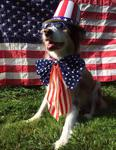
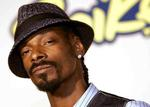
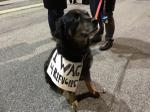
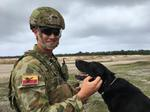
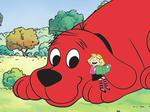
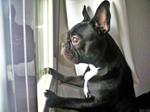
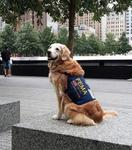
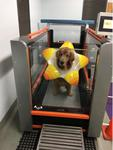
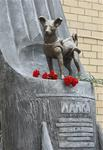
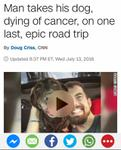
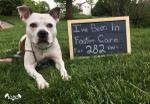
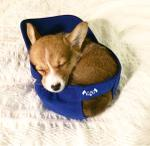
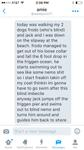
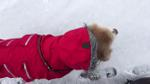
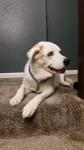

In [98]:
# n=10, can choose the value you want
path = '/Users/mhl/Documents/NanoDegree/Project2/images/'
top_n_author = dog_rates_clean.loc[dog_rates_clean.rating_numerator.sort_values(ascending=False).index[:n]].copy()
#top_n_author = top_n_author.reset_index(drop=True)
top_n_author.index = list(range(1,n+1))
top_n_author['image'] = path + top_n_author.jpg_url.str.extract('\/([^\/]*\.(jpg|png))$')[0]
top_n_author['image'] = top_n_author.image.map(lambda f: get_thumbnail(f))
#top_n_author.style.set_properties(subset=['text'], **{'width': '10px'})
# show 
HTML(top_n_author[['text', 'name','stage','breed','rating_numerator','image']].to_html(formatters={'image': image_formatter}, escape=False))

#### Top n dogs in different view
- retweet count view

In [99]:
top_n_url_retweet = dog_rates_clean.loc[dog_rates_clean.retweet_count.sort_values(ascending=False).index[:n], 'jpg_url']
top_n_url_retweet.str.extract('\/([^\/]*\.(jpg|png))$')
list(top_n_url_retweet)

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  


['https://pbs.twimg.com/ext_tw_video_thumb/744234667679821824/pu/img/1GaWmtJtdqzZV7jy.jpg',
 'https://pbs.twimg.com/ext_tw_video_thumb/807106774843039744/pu/img/8XZg1xW35Xp2J6JW.jpg',
 'https://pbs.twimg.com/ext_tw_video_thumb/739238016737267712/pu/img/-tLpyiuIzD5zR1et.jpg',
 'https://pbs.twimg.com/media/C2tugXLXgAArJO4.jpg',
 'https://pbs.twimg.com/ext_tw_video_thumb/879415784908390401/pu/img/cX7XI1TnUsseGET5.jpg',
 'https://pbs.twimg.com/media/C12whDoVEAALRxa.jpg',
 'https://pbs.twimg.com/media/CzG425nWgAAnP7P.jpg',
 'https://pbs.twimg.com/ext_tw_video_thumb/761672828462718981/pu/img/R00UYAAWB3GtuHdI.jpg',
 'https://pbs.twimg.com/media/DAZAUfBXcAAG_Nn.jpg',
 'https://pbs.twimg.com/ext_tw_video_thumb/859196962498805762/pu/img/-yBpr4-o4GJZECYE.jpg',
 'https://pbs.twimg.com/media/CWJqN9iWwAAg86R.jpg',
 'https://pbs.twimg.com/ext_tw_video_thumb/817827663108771841/pu/img/e9oi839RGWJR37jF.jpg',
 'https://pbs.twimg.com/ext_tw_video_thumb/678399528077250560/pu/img/BOjUNHRsYLeSo0hl.jpg',
 'ht

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  


,text,name,stage,breed,retweet_count,image
1,Here's a doggo realizing you can stand in a pool. 13/10 enlightened af (vid by Tina Conrad) https://t.co/7wE9LTEXC4,,doggo,Labrador_retriever,79116,
2,This is Stephan. He just wants to help. 13/10 such a good boy https://t.co/DkBYaCAg2d,Stephan,,Chihuahua,56373,
3,Here's a doggo blowing bubbles. It's downright legendary. 13/10 would watch on repeat forever (vid by Kent Duryee) https://t.co/YcXgHfp1EC,,doggo,Eskimo_dog,52101,
4,Here's a super supportive puppo participating in the Toronto #WomensMarch today. 13/10 https://t.co/nTz3FtorBc,,puppo,,47958,
5,This is Duddles. He did an attempt. 13/10 someone help him (vid by Georgia Felici) https://t.co/UDT7ZkcTgY,Duddles,,,45655,
6,This is Bo. He was a very good First Doggo. 14/10 would be an absolute honor to pet https://t.co/AdPKrI8BZ1,Bo,doggo,,42045,
7,"""Good afternoon class today we're going to learn what makes a good boy so good"" 13/10 https://t.co/f1h2Fsalv9",,,,40437,
8,Ohboyohboyohboyohboyohboyohboyohboyohboyohboyohboyohboyohboyohboyohboyohboy. 10/10 for all (by happytailsresort) https://t.co/EY8kEFuzK7,,,,33230,
9,"This is Jamesy. He gives a kiss to every other pupper he sees on his walk. 13/10 such passion, much tender https://t.co/wk7TfysWHr",Jamesy,pupper,French_bulldog,32705,
10,We only rate dogs. This is quite clearly a smol broken polar bear. We'd appreciate if you only send dogs. Thank you... 12/10 https://t.co/g2nSyGenG9,,,,32589,

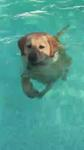
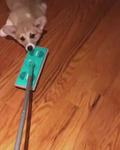
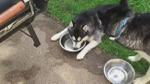
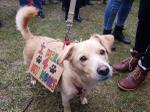
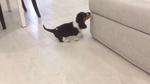
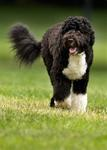
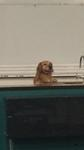
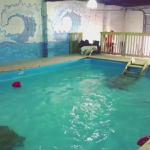
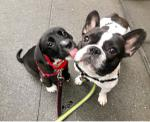
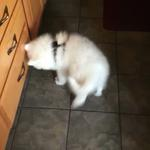
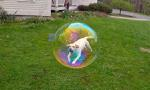
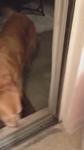
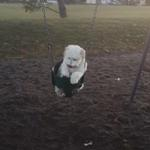
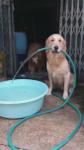
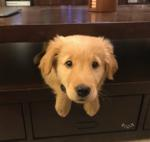

In [100]:
# n=10, can choose the value you want
path = '/Users/mhl/Documents/NanoDegree/Project2/images/'
top_n_retweet = dog_rates_clean.loc[dog_rates_clean.retweet_count.sort_values(ascending=False).index[:n]].copy()
#top_n_retweet = top_n_retweet.reset_index(drop=True)
top_n_retweet.index = list(range(1,n+1))
top_n_retweet['image'] = path + top_n_retweet.jpg_url.str.extract('\/([^\/]*\.(jpg|png))$')[0]
top_n_retweet['image'] = top_n_retweet.image.map(lambda f: get_thumbnail(f))
# show 
HTML(top_n_retweet[['text','name','stage','breed','retweet_count','image']].to_html(formatters={'image': image_formatter}, escape=False))

In [101]:
'''
path = '/Users/mhl/Documents/NanoDegree/Project2/images/'
top_n_retweet_p = dog_rates_clean.loc[dog_rates_clean.retweet_p.sort_values(ascending=False).index[:n]].copy()
top_n_retweet_p = top_n_retweet_p.reset_index(drop=True)
top_n_retweet_p['image'] = path + top_n_retweet_p.jpg_url.str.extract('\/([^\/]*\.(jpg|png))$')[0]
top_n_retweet_p['image'] = top_n_retweet_p.image.map(lambda f: get_thumbnail(f))
# show 
HTML(top_n_retweet_p[['text','name','stage','breed','retweet_p','image']].to_html(formatters={'image': image_formatter}, escape=False))
'''
# no much difference

"\npath = '/Users/mhl/Documents/NanoDegree/Project2/images/'\ntop_n_retweet_p = dog_rates_clean.loc[dog_rates_clean.retweet_p.sort_values(ascending=False).index[:n]].copy()\ntop_n_retweet_p = top_n_retweet_p.reset_index(drop=True)\ntop_n_retweet_p['image'] = path + top_n_retweet_p.jpg_url.str.extract('\\/([^\\/]*\\.(jpg|png))$')[0]\ntop_n_retweet_p['image'] = top_n_retweet_p.image.map(lambda f: get_thumbnail(f))\n# show \nHTML(top_n_retweet_p[['text','name','stage','breed','retweet_p','image']].to_html(formatters={'image': image_formatter}, escape=False))\n"

#### Top n dogs in different view
- favorite count view

In [102]:
top_n_url_favorite = dog_rates_clean.loc[dog_rates_clean.favorite_count.sort_values(ascending=False).index[:n], 'jpg_url']
top_n_url_favorite.str.extract('\/([^\/]*\.jpg)$')
list(top_n_url_favorite)

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  


['https://pbs.twimg.com/media/C2tugXLXgAArJO4.jpg',
 'https://pbs.twimg.com/ext_tw_video_thumb/744234667679821824/pu/img/1GaWmtJtdqzZV7jy.jpg',
 'https://pbs.twimg.com/ext_tw_video_thumb/879415784908390401/pu/img/cX7XI1TnUsseGET5.jpg',
 'https://pbs.twimg.com/ext_tw_video_thumb/807106774843039744/pu/img/8XZg1xW35Xp2J6JW.jpg',
 'https://pbs.twimg.com/media/DAZAUfBXcAAG_Nn.jpg',
 'https://pbs.twimg.com/media/C12whDoVEAALRxa.jpg',
 'https://pbs.twimg.com/ext_tw_video_thumb/859196962498805762/pu/img/-yBpr4-o4GJZECYE.jpg',
 'https://pbs.twimg.com/media/DBQwlFCXkAACSkI.jpg',
 'https://pbs.twimg.com/media/CzG425nWgAAnP7P.jpg',
 'https://pbs.twimg.com/media/DC5YqoQW0AArOLH.jpg',
 'https://pbs.twimg.com/media/DEfjEaNXkAAtPlj.jpg',
 'https://pbs.twimg.com/media/C_bIo7QXYAAGfPu.jpg',
 'https://pbs.twimg.com/ext_tw_video_thumb/739238016737267712/pu/img/-tLpyiuIzD5zR1et.jpg',
 'https://pbs.twimg.com/media/C4bTH6nWMAAX_bJ.jpg',
 'https://pbs.twimg.com/media/DFDw2tyUQAAAFke.jpg']

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  


,text,name,stage,breed,favorite_count,image
1,Here's a super supportive puppo participating in the Toronto #WomensMarch today. 13/10 https://t.co/nTz3FtorBc,,puppo,,132318,
2,Here's a doggo realizing you can stand in a pool. 13/10 enlightened af (vid by Tina Conrad) https://t.co/7wE9LTEXC4,,doggo,Labrador_retriever,130533,
3,This is Duddles. He did an attempt. 13/10 someone help him (vid by Georgia Felici) https://t.co/UDT7ZkcTgY,Duddles,,,107834,
4,This is Stephan. He just wants to help. 13/10 such a good boy https://t.co/DkBYaCAg2d,Stephan,,Chihuahua,106634,
5,"This is Jamesy. He gives a kiss to every other pupper he sees on his walk. 13/10 such passion, much tender https://t.co/wk7TfysWHr",Jamesy,pupper,French_bulldog,106481,
6,This is Bo. He was a very good First Doggo. 14/10 would be an absolute honor to pet https://t.co/AdPKrI8BZ1,Bo,doggo,,95138,
7,We only rate dogs. This is quite clearly a smol broken polar bear. We'd appreciate if you only send dogs. Thank you... 12/10 https://t.co/g2nSyGenG9,,,,94035,
8,This is Zoey. She really likes the planet. Would hate to see willful ignorance and the denial of fairly elemental science destroy it. 13/10 https://t.co/T1xlgaPujm,Zoey,,golden_retriever,84753,
9,"""Good afternoon class today we're going to learn what makes a good boy so good"" 13/10 https://t.co/f1h2Fsalv9",,,,83401,
10,This is Aja. She was just told she's a good dog. Suspicions confirmed. 13/10 would tell again https://t.co/lsPyyAiF1r,Aja,,Chesapeake_Bay_retriever,81450,

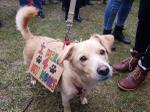
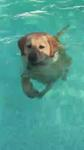
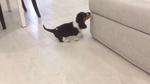
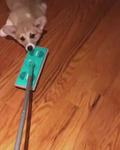
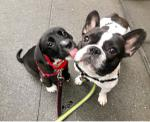
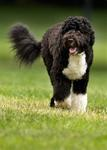
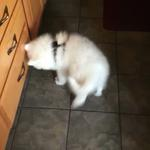
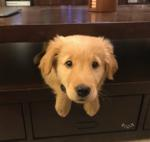
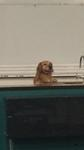
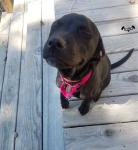
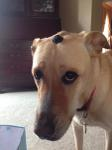
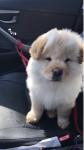
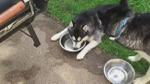
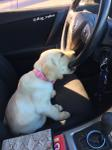
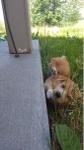

In [103]:
# n=10, can choose the value you want
path = '/Users/mhl/Documents/NanoDegree/Project2/images/'
top_n_favorite = dog_rates_clean.loc[dog_rates_clean.favorite_count.sort_values(ascending=False).index[:n]].copy()
#top_n_favorite = top_n_favorite.reset_index(drop=True)
top_n_favorite.index = list(range(1,n+1))
top_n_favorite['image'] = path + top_n_favorite.jpg_url.str.extract('\/([^\/]*\.(jpg|png))$')[0]
top_n_favorite['image'] = top_n_favorite.image.map(lambda f: get_thumbnail(f))
# show 
HTML(top_n_favorite[['text','name','stage','breed','favorite_count','image']].to_html(formatters={'image': image_formatter}, escape=False))

In [104]:
'''
path = '/Users/mhl/Documents/NanoDegree/Project2/images/'
top_n_favorite_p = dog_rates_clean.loc[dog_rates_clean.favorite_p.sort_values(ascending=False).index[:10]].copy()
top_n_favorite_p = top_n_favorite_p.reset_index(drop=True)
top_n_favorite_p['image'] = path + top_n_favorite_p.jpg_url.str.extract('\/([^\/]*\.(jpg|png))$')[0]
top_n_favorite_p['image'] = top_n_favorite_p.image.map(lambda f: get_thumbnail(f))
# show 
HTML(top_n_favorite_p[['text','name','stage','breed','favorite_p','image']].to_html(formatters={'image': image_formatter}, escape=False))
'''
# no much difference

"\npath = '/Users/mhl/Documents/NanoDegree/Project2/images/'\ntop_n_favorite_p = dog_rates_clean.loc[dog_rates_clean.favorite_p.sort_values(ascending=False).index[:10]].copy()\ntop_n_favorite_p = top_n_favorite_p.reset_index(drop=True)\ntop_n_favorite_p['image'] = path + top_n_favorite_p.jpg_url.str.extract('\\/([^\\/]*\\.(jpg|png))$')[0]\ntop_n_favorite_p['image'] = top_n_favorite_p.image.map(lambda f: get_thumbnail(f))\n# show \nHTML(top_n_favorite_p[['text','name','stage','breed','favorite_p','image']].to_html(formatters={'image': image_formatter}, escape=False))\n"

### Visulization 
- <font color='red'>Revise 4</font>: find the high score dogs and add the text to image and show them out.

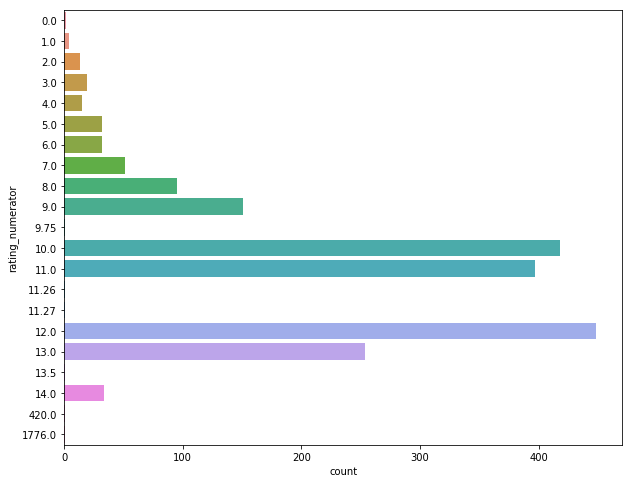

In [105]:
fig,axis = plt.subplots(figsize=(10,8))
sns.countplot(y='rating_numerator', data=dog_rates_clean)
fig.savefig('rating_val')

From the figure, we can see, the most frequent score author provides is 10, 11, 12; 13 should be middle layer score; 14 should be high score. We can also see some weird score, e.g., 9.75, 11.26, 11.27, 13.5. Can check more for the weired score, may author wants to describe more subjective feeling on them. 

In [106]:
# combine all the infomation we got
path = '/Users/mhl/Documents/NanoDegree/Project2/images/'
path_new = '/Users/mhl/Documents/NanoDegree/Project2/images_new/'
font_path = '/Users/mhl/Documents/NanoDegree/Project2/font/Y2K Neophyte Italic.ttf'

In [107]:
index_14_more = dog_rates_clean.rating_numerator[dog_rates_clean.rating_numerator >= 14].sort_values(ascending=False).index
top_n_author = dog_rates_clean.loc[index_14_more].copy()
top_n_author.index = list(range(1,len(top_n_author)+1))

In [108]:
fontsize = 15
font = ImageFont.truetype(font_path, fontsize)
max_line_num = 4
margin = (fontsize+2) * max_line_num * 2
sig_margin = int(margin/2)
bg_color = (255, 255, 255)
text_color = (0, 0, 0)
vowel_list = ['a', 'e', 'i', 'o', 'u']
top_n_author['image_new'] = top_n_author.jpg_url.str.extract('\/([^\/]*\.(jpg|png))$')[0]
for index in top_n_author.index:
    img = Image.open(path + top_n_author.loc[index, 'image_new'])
    img_resize = img.resize((400,400))
    w, h = img_resize.size
    bg = Image.new('RGB', (w+margin, h+margin), bg_color)
    draw = ImageDraw.Draw(bg)
    lines = textwrap.wrap(top_n_author.loc[index, 'text'], width=50)
    h_text = 0
    str_intro = ''
    for line in lines:
        draw.text((sig_margin,h_text+sig_margin/max_line_num*(max_line_num-len(lines))), line, font=font, fill=text_color)
        h_text += fontsize
    if top_n_author.loc[index, 'name'] != '':
        str_intro = 'I\'m '
        str_intro += top_n_author.loc[index, 'name']
    if top_n_author.loc[index, 'breed'] != '':
        if str_intro == '':
            pass
        else:
            str_intro += ', '
        if top_n_author.loc[index, 'breed'][0].lower() in vowel_list:
            str_intro += 'an '
        else:
            str_intro += 'a '
        str_intro += top_n_author.loc[index, 'breed']
    if top_n_author.loc[index, 'stage'] != '':
        if str_intro == '':
            pass
        else:
            str_intro += ', '
        str_intro += top_n_author.loc[index, 'stage']
    draw.text(((w+margin)/2 - font.getsize(str_intro)[0]/2, h+sig_margin), str_intro, font=font, fill=text_color)
    bg.paste(img_resize, (sig_margin, sig_margin))
    bg.save(path_new+str(index)+'.jpg')
    top_n_author.loc[index, 'image_new'] = path_new+str(index)+'.jpg'
    #bg.show()
#top_n_author['image_new'] = top_n_author.image_new.map(lambda f: get_thumbnail(f))

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:9: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  if __name__ == '__main__':


In [109]:
'''
# show 
#HTML(top_n_author[['image_new']].to_html(formatters={'image_new': image_formatter}, escape=False))
images = []
for img in top_n_author.image_new[:5]:
    images.append(mpimg.imread(img))
plt.figure(figsize=(50,50))
columns = 1
for i, image in enumerate(images):
    plt.subplot(len(images) / columns + 1, columns, i + 1)
    plt.imshow(image)
    plt.axis('off')
# not that clear
'''

"\n# show \n#HTML(top_n_author[['image_new']].to_html(formatters={'image_new': image_formatter}, escape=False))\nimages = []\nfor img in top_n_author.image_new[:5]:\n    images.append(mpimg.imread(img))\nplt.figure(figsize=(50,50))\ncolumns = 1\nfor i, image in enumerate(images):\n    plt.subplot(len(images) / columns + 1, columns, i + 1)\n    plt.imshow(image)\n    plt.axis('off')\n# not that clear\n"

In [110]:
# check te relationship between retweet count and favorite count

In [111]:
dog_rates_clean['retweet_count'].corr(dog_rates_clean['favorite_count'])

0.9150885847365116

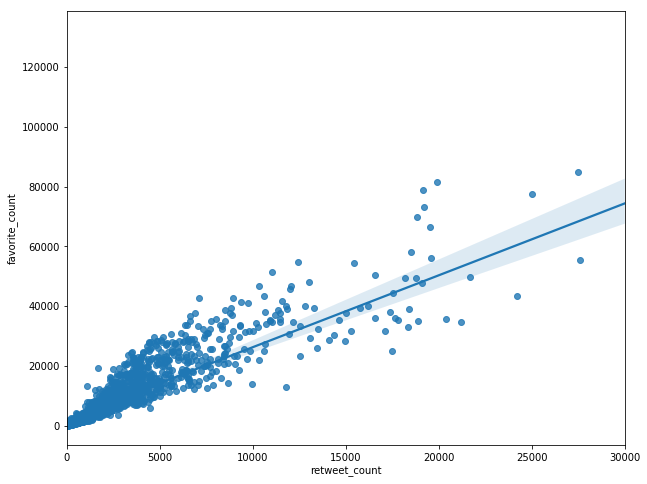

In [112]:
fig,axis = plt.subplots(figsize=(10,8))
plt.xlim(0, 30000)
sns.regplot(x='retweet_count', y='favorite_count', data=dog_rates_clean)
fig.savefig('corr.jpg')

We can see there is strong correlation between retweet count and favorite count

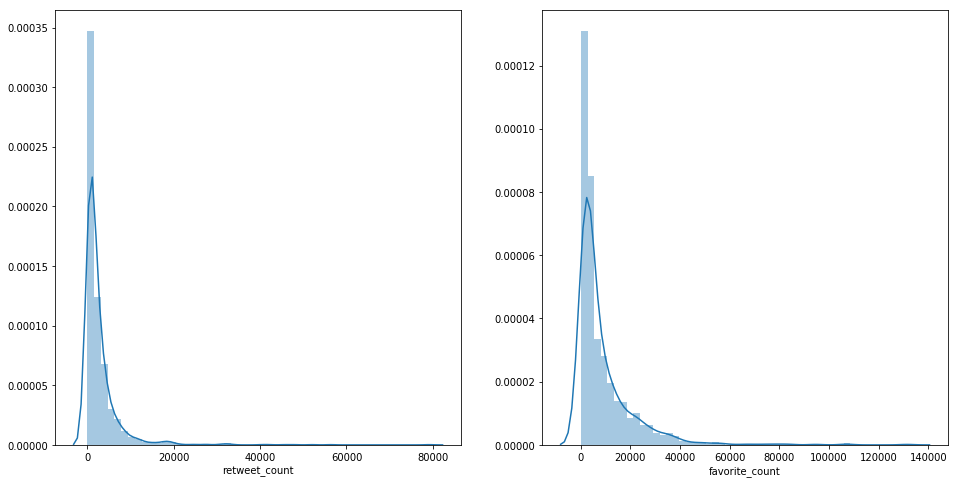

In [113]:
fig, (axis1, axis2)= plt.subplots(nrows=1, ncols=2, figsize=(16,8))
sns.distplot(dog_rates_clean['retweet_count'], ax=axis1)
sns.distplot(dog_rates_clean['favorite_count'], ax=axis2)
fig.savefig('distribution.jpg')

From the figure, we can see favorite count is higher and wider than retweet count. May this because it's easier to attract user to make a 'click' action compared to retweet. The tail is long for both retweet and favorite, which means only a very small part of the tweets will motivate a large amount of users to retweet

In [114]:
# since the breed accuracy is not high, therefor, the following analysis is not that reliable
# data accuraty is the base for future analysis, otherwise all are rubbish
breed_retweet = dog_rates_clean[['breed', 'retweet_count']].groupby('breed').mean()
breed_retweet.retweet_count.sort_values()

breed
Tibetan_terrier                66.000000  
giant_schnauzer                99.000000  
redbone                        181.500000 
English_springer               263.000000 
miniature_schnauzer            346.000000 
Gordon_setter                  356.500000 
groenendael                    413.000000 
Japanese_spaniel               468.000000 
Rhodesian_ridgeback            471.000000 
Welsh_springer_spaniel         568.000000 
Irish_terrier                  603.000000 
Lhasa                          605.000000 
EntleBucher                    700.000000 
standard_poodle                753.000000 
Appenzeller                    756.000000 
Ibizan_hound                   887.000000 
Dandie_Dinmont                 976.500000 
Yorkshire_terrier              1026.666667
Boston_bull                    1032.600000
kuvasz                         1084.666667
boxer                          1137.375000
Airedale                       1149.333333
soft-coated_wheaten_terrier    1199.250000
minia